In [0]:
#@title Auteur : Mohamed BEN SAAD et Elias ABDELLI

In [0]:
#@title Fichier import
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#@title Création des données
X,y = make_blobs(n_samples=100, n_features=2, centers=2)

In [0]:
#@title Fonction droite de séparation 
def g(x,w):
  return -(w[0]/w[2]+(w[1]/w[2])*x)

In [263]:
#@title Modélisation des données
target_names = ["Area", "Perimeter", "Classes"]
y[y==0] = -1
y_n = pd.DataFrame(data=np.hstack((X, np.reshape(y, (100, 1)))), columns=target_names)
print(y_n)

        Area  Perimeter  Classes
0   4.723421  -2.337875     -1.0
1   3.957993  -2.563426     -1.0
2  -0.911640  -6.150985      1.0
3  -0.226706  -5.551599      1.0
4   3.449753  -3.017529     -1.0
..       ...        ...      ...
95 -0.208830  -6.228993      1.0
96 -0.002767  -6.376350      1.0
97  3.995045  -3.054445     -1.0
98  0.347839  -5.241355      1.0
99 -2.686766  -6.075564      1.0

[100 rows x 3 columns]


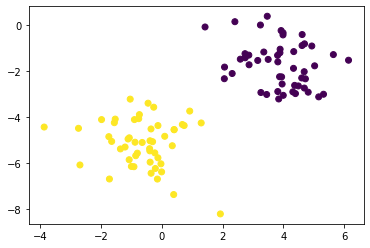

In [251]:
#@title Affichage des données
plt.scatter(y_n["Area"],y_n["Perimeter"],c=y_n["Classes"])
plt.show()

In [0]:
#@title  Fonction erreur adaline
def err_adal(y,w,data):
  return np.subtract(y, np.dot(data,w))

In [0]:
#@title  Fonction calcul du gradient
def grad_adal(error,x):
  return np.dot(-2, np.dot(error,x))

In [0]:
#@title Fonction adaptation des poids 
def adapt_adal(w,grad,eps):
  w = np.subtract(w,np.dot(eps,grad))
  return w

In [0]:
#@title Fonction Adaline
def Adaline(data,target,eps,it):
  dataA = np.hstack(([[1]]*len(data),data))
  w = [-1,1,1]
  plt.scatter(dataA[:,1],dataA[:,2],c=target)
  plt.plot(range(-10,10),[g(x,w) for x in range(-10,10)], 'g-', label='first separation')
  err = 1
  while(err > it):
    err = 0
    for x,d in zip(dataA,target):
      e = err_adal(d,w,x)
      grad = grad_adal(e,x)
      w = adapt_adal(w,grad,eps)
      err = err + e
    plt.plot(range(-10,10),[g(x,w) for x in range(-10,10)], 'r-')
  plt.plot(range(-10,10),[g(x,w) for x in range(-10,10)], 'b', label='best separation')
  plt.legend()
  plt.title("Adaline")
  plt.xlabel("Axe X")
  plt.ylabel("Axe Y")
  plt.xlim(-10,10)
  plt.ylim(-10,10)
  return w

Poids finaux =  [-0.32861833 -0.19878392 -0.14187876]


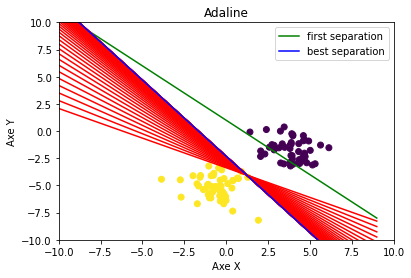

In [256]:
#@title Test Adaline sur nos données
data = y_n[["Area","Perimeter"]]
target = y_n["Classes"]
s = Adaline(data,target,0.01,0.001)
print("Poids finaux = ", s)

In [0]:
#@title  Fonction sortie perceptron
def sortie_perc(x,w):
    return f(sum(np.array(w)*np.array(x)))

In [0]:
#@title  Fonction activation perceptron
def f(x):
  if (x > 0) :
    return 1
  else:
    return -1

In [0]:
#@title  Fonction erreur gradient
def err_perc(x,y):
  return  np.divide(x,y)

In [0]:
#@title  Fonction calcul du gradient
def grad_perc(x,d):
  if (d==1):
    return -x
  else:
    return x

In [0]:
#@title Fonction adaptation des poids 
def adapt_perc(w,grad,eps):
  w = w - np.dot(eps,grad)
  return w

In [0]:
#@title Perceptron
def Perceptron(data,target,eps,it):
  dataP = np.hstack(([[1]]*len(data),data))
  w = [1,9,5]
  plt.scatter(dataP[:,1],dataP[:,2],c=target)
  plt.plot(range(-10,10),[g(x,w) for x in range(-10,10)], 'g-', label='first separation')
  err = 1
  while(err > it):
      err = 0
      for x,d in zip(dataP,target):
          sortie = sortie_perc(x,w)
          if(sortie!=d):
            grad = grad_perc(x,d)
            w = adapt_perc(w,grad,eps)
            err = err + 1
      plt.plot(range(-10,10),[g(x,w) for x in range(-10,10)], 'r-')
      err = err_perc(err,len(dataP))
  plt.plot(range(-10,10),[g(x,w) for x in range(-10,10)], 'b', label='best separation')
  plt.legend()
  plt.title("Perceptron") 
  plt.xlabel("Axe X")
  plt.ylabel("Axe Y")
  plt.xlim(-10,10)
  plt.ylim(-10,10)
  return w

Poids finaux =  [ 0.5        -1.06213828 -0.33472469]


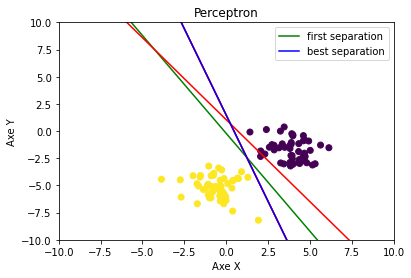

In [264]:
#@title Test Perceptron sur nos données
s = Perceptron(data,target,0.1,0.001)
print("Poids finaux = ", s)